# This notebook is to extract cluster with the most DE from network and run it through embedding

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from functions.eda_functions import *
from functions.subset_network import subset_network
from functions.process_phenotype import *
from functions.network_embedding import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
tom_df = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\Kapoor_TOM.csv', index_col = 0)
comm_df = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\network_louvain_default.csv', index_col = 0)

In [3]:
tom_df.head(3)

,ENSG00000227232,ENSG00000237683,ENSG00000241860,ENSG00000228463,ENSG00000225972,ENSG00000225630,ENSG00000237973,ENSG00000229344,ENSG00000248527,ENSG00000198744,...,ENSG00000226555,ENSG00000176728,ENSG00000217896,ENSG00000185275,ENSG00000131002,ENSG00000267793,ENSG00000260197,ENSG00000012817,ENSG00000229236,ENSG00000198692
ENSG00000227232,1.00000,0.000020,0.000030,0.000005,0.000073,0.000039,0.000023,0.000124,0.000057,0.000027,...,0.000003,0.000004,0.000003,0.000014,0.000003,0.000002,0.000003,0.000004,0.000004,0.000004
ENSG00000237683,0.00002,1.000000,0.000502,0.000009,0.000014,0.000004,0.000005,0.000023,0.000017,0.000003,...,0.000002,0.000002,0.000003,0.000005,0.000001,0.000002,0.000002,0.000001,0.000002,0.000001
ENSG00000241860,0.00003,0.000502,1.000000,0.000261,0.000013,0.000009,0.000003,0.000009,0.000011,0.000008,...,0.000008,0.000008,0.000008,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008


In [4]:
cluster4_genes = comm_df[comm_df.louvain_label == 4].id

In [5]:
cluster4_tom = tom_df[cluster4_genes]

In [6]:
cluster4_tom = cluster4_tom[cluster4_tom.index.isin(cluster4_genes)]

In [7]:
deseq = pd.read_excel('G:/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')

In [8]:
deseq.head(3)

,id,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000188976,NOC2L,714.598428,0.035156,0.037363,0.940936,0.346738,0.825726
1,ENSG00000187961,KLHL17,114.531243,-0.037809,0.048442,-0.780490,0.435103,0.869017
2,ENSG00000188290,HES4,230.574761,-0.032159,0.051718,-0.621809,0.534067,0.901352


In [9]:
cluster4_tom.head()

,ENSG00000187608,ENSG00000177133,ENSG00000142611,ENSG00000272235,ENSG00000236266,ENSG00000116285,ENSG00000142583,ENSG00000171612,ENSG00000130940,ENSG00000116670,...,ENSG00000156925,ENSG00000185985,ENSG00000171100,ENSG00000102287,ENSG00000182492,ENSG00000089820,ENSG00000196924,ENSG00000160219,ENSG00000155962,ENSG00000224216
ENSG00000187608,1.000000,0.000087,0.000034,0.000018,0.000003,0.000009,0.000029,0.000012,0.000007,0.000018,...,0.000004,0.000018,0.000029,0.000014,0.000072,0.000176,0.000107,0.000063,0.000023,0.000008
ENSG00000177133,0.000087,1.000000,0.016747,0.009040,0.000112,0.000011,0.000048,0.001439,0.000035,0.000128,...,0.000046,0.002943,0.001201,0.000046,0.000558,0.000422,0.000441,0.000140,0.000017,0.000055
ENSG00000142611,0.000034,0.016747,1.000000,0.022895,0.000223,0.000179,0.000422,0.005372,0.000645,0.000480,...,0.000108,0.005985,0.009245,0.000695,0.000657,0.000499,0.000881,0.000436,0.000110,0.000249
ENSG00000272235,0.000018,0.009040,0.022895,1.000000,0.000208,0.000176,0.000435,0.003193,0.000523,0.000451,...,0.000086,0.002665,0.008269,0.000589,0.000462,0.000331,0.001053,0.000456,0.000064,0.000170
ENSG00000236266,0.000003,0.000112,0.000223,0.000208,1.000000,0.000049,0.000032,0.000192,0.000015,0.000006,...,0.000007,0.000155,0.000819,0.000030,0.000034,0.000016,0.000116,0.000043,0.000020,0.000075


# use egonet to subset the network before the next step

In [13]:
(abs(deseq_cluster4['log2FoldChange']) > 0.15).sum()

152

In [14]:
152*152

23104

# Check scale-free assumption

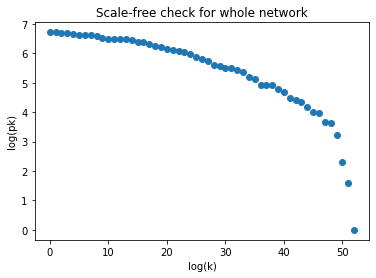

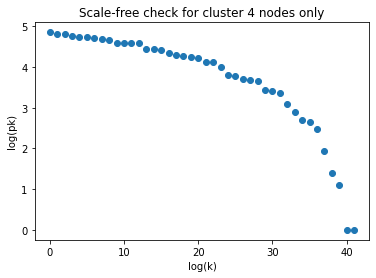

In [15]:
scale_free_validate(tom_df, 'whole network')
scale_free_validate(cluster4_tom, 'cluster 4 nodes only')

In [50]:
# make a new df to cluster 4 only subnetwork but instead of subsetting cluster 4, replace all the weights with 0 for nodes not in cluster 4
cluster4_no_cutout = cluster4_tom.copy()
# the nodes that were cut out (non cluster 4 genes)
cutout_nodes = list(set(tom_df.columns) - set(cluster4_genes))
col_w_zeros = np.zeros((2624, 17287)) # 0 to fill the gene columns that aren't in cluster 4
cluster4_no_cutout[cutout_nodes] = col_w_zeros

In [54]:
cluster4_no_cutout.shape

(2624, 19911)

In [42]:
# df with 0 with fill the gene rows that aren't in cluster 4
to_stack = pd.DataFrame(0, columns = cluster4_tom.columns, index = cutout_nodes)
cluster4_no_cutout = pd.concat([cluster4_no_cutout, to_stack])

# Compare whole and subnetwork distance

In [64]:
subset_networks = []
subset_G = []
for weight in [0.218, 0.24]:
    subset, G = subset_network(tom_df, weight, 0.98)
    subset_networks.append(subset)
    subset_G.append(G)

Number of edges left: 10100.0
Number of edges left: 4967.0


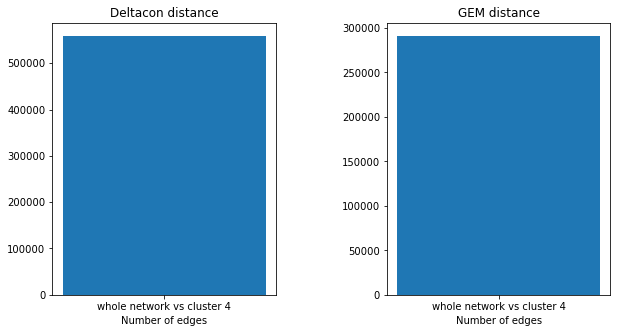

In [62]:
plot_graph_distance([tom_df, subset_networks[0], subset_networks[1], cluster4_no_cutout], ['whole network', '10k edges', '5k edges', 'cluster 4'])

# Compare whole and subnetwork communities

In [109]:
# default setting got 82 clusters. default is not appropriate since this already came from a cluster so a specific setting was used to get 4 clusters only
cluster4_communities = run_louvain(cluster4_tom, resolution = 0.15, n_aggregations = -1) 

In [87]:
# subset 10k edges with nodes removal for fair comparison with cluster 4 (also nodes with degrees = 0 removed)
subset10k_cutout, subset_G = subset_network(tom_df, 0.21, 0.98, 10000)
subset10k_communities = run_louvain(subset10k_cutout)

[0.07313336626264665, 0.34306821072521054]


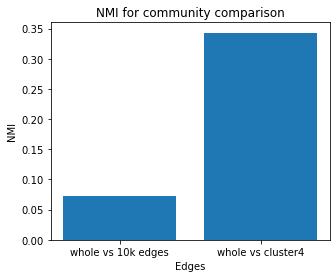

In [91]:
# subnetworks cut out nodes with degree = 0
comparison_names = ['whole vs 10k edges', 'whole vs cluster4']
plot_cluster_nmi_comparison(comm_df, [subset10k_communities, cluster4_communities], 
                            'louvain_label', comparison_names)

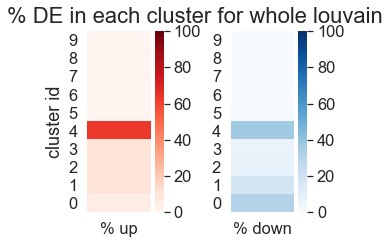

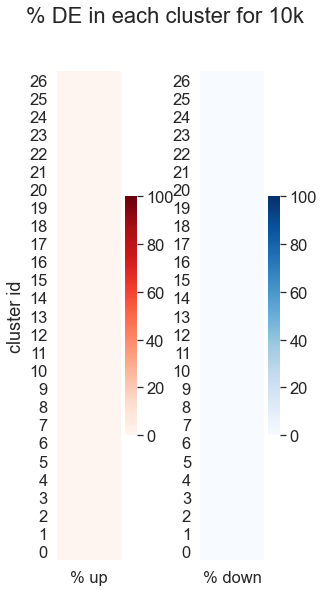

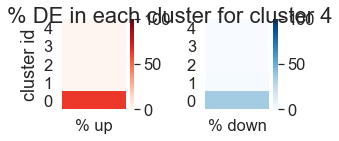

In [104]:
network_names = ['whole louvain', '10k', 'cluster 4']
for i, cluster_df in enumerate([comm_df, subset10k_communities, cluster4_communities]):
    cluster_DE_perc(cluster_df, 'louvain_label', network_names[i])

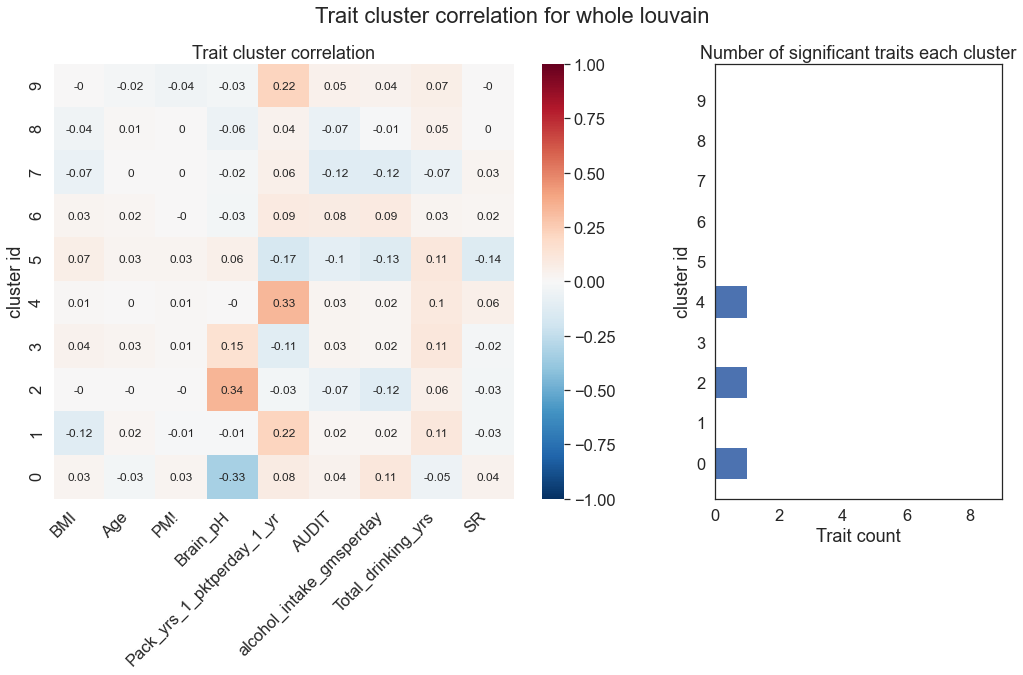

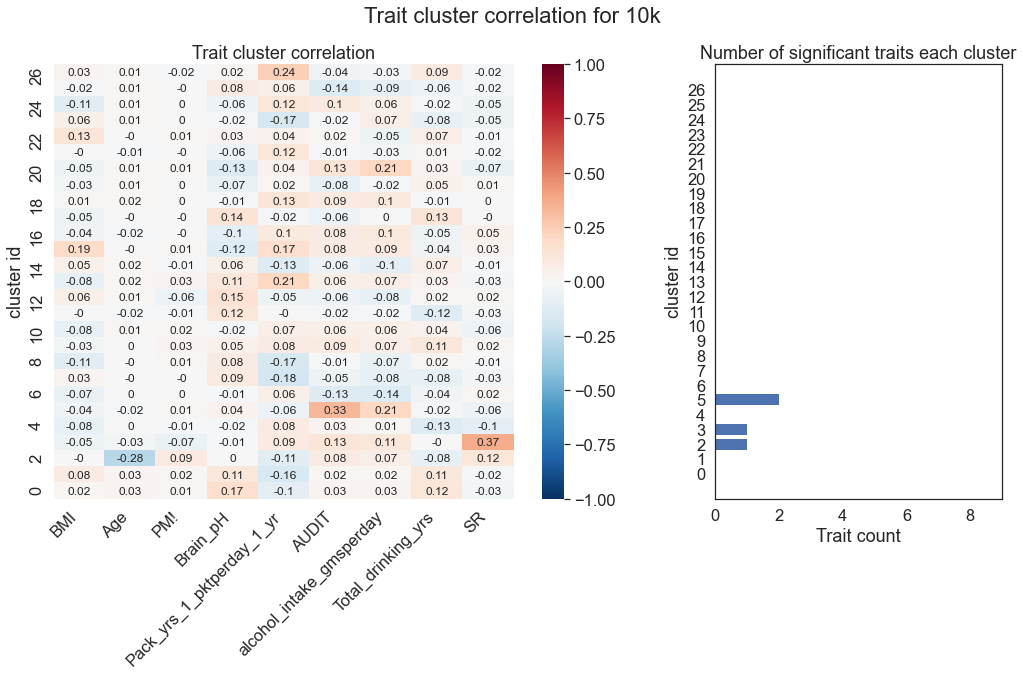

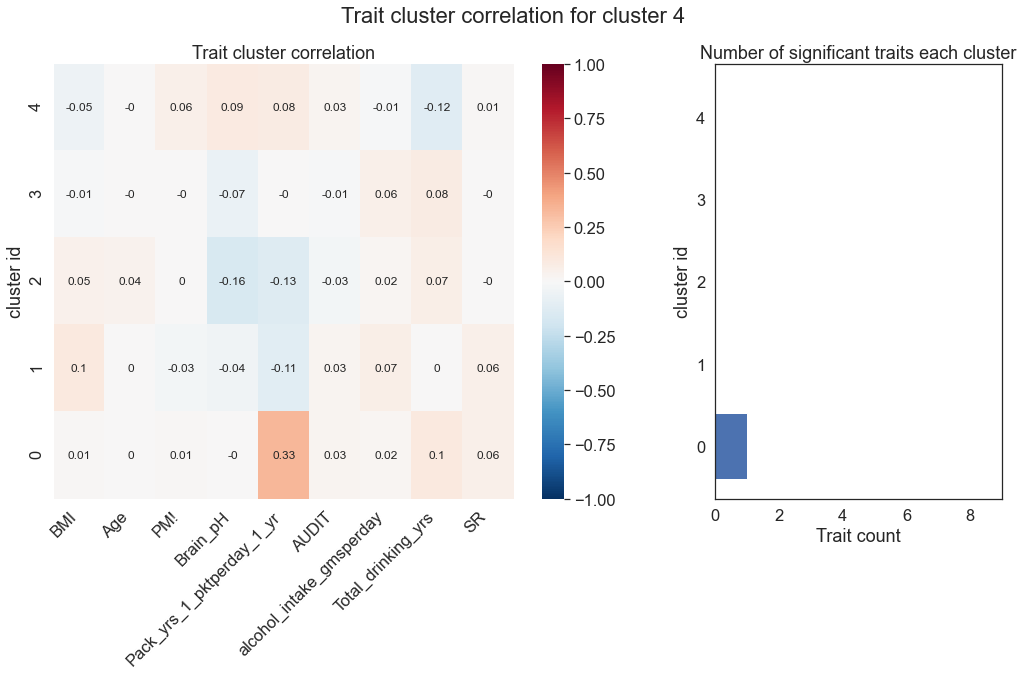

In [103]:
network_names = ['whole louvain', '10k', 'cluster 4']
for i, cluster_df in enumerate([comm_df, subset10k_communities, cluster4_communities]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', network_names[i])

In [111]:
deseq = pd.read_excel('G:/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')

In [112]:
deseq.head()

,id,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000188976,NOC2L,714.598428,0.035156,0.037363,0.940936,0.346738,0.825726
1,ENSG00000187961,KLHL17,114.531243,-0.037809,0.048442,-0.780490,0.435103,0.869017
2,ENSG00000188290,HES4,230.574761,-0.032159,0.051718,-0.621809,0.534067,0.901352
3,ENSG00000187608,ISG15,139.620400,0.178424,0.055881,3.192942,0.001408,0.092719
4,ENSG00000188157,AGRN,1872.449137,-0.072838,0.050387,-1.445564,0.148300,0.661963


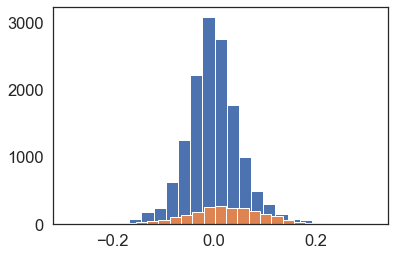

In [118]:
# checking log2FC distribution from deseq and cluster 4 
plt.hist(deseq.log2FoldChange, bins = 25)
plt.hist(deseq[deseq.id.isin(cluster4_genes)].log2FoldChange, bins = 25);

In [131]:
cluster4_tom.head()

,ENSG00000187608,ENSG00000177133,ENSG00000142611,ENSG00000272235,ENSG00000236266,ENSG00000116285,ENSG00000142583,ENSG00000171612,ENSG00000130940,ENSG00000116670,...,ENSG00000156925,ENSG00000185985,ENSG00000171100,ENSG00000102287,ENSG00000182492,ENSG00000089820,ENSG00000196924,ENSG00000160219,ENSG00000155962,ENSG00000224216
ENSG00000187608,1.000000,0.000087,0.000034,0.000018,0.000003,0.000009,0.000029,0.000012,0.000007,0.000018,...,0.000004,0.000018,0.000029,0.000014,0.000072,0.000176,0.000107,0.000063,0.000023,0.000008
ENSG00000177133,0.000087,1.000000,0.016747,0.009040,0.000112,0.000011,0.000048,0.001439,0.000035,0.000128,...,0.000046,0.002943,0.001201,0.000046,0.000558,0.000422,0.000441,0.000140,0.000017,0.000055
ENSG00000142611,0.000034,0.016747,1.000000,0.022895,0.000223,0.000179,0.000422,0.005372,0.000645,0.000480,...,0.000108,0.005985,0.009245,0.000695,0.000657,0.000499,0.000881,0.000436,0.000110,0.000249
ENSG00000272235,0.000018,0.009040,0.022895,1.000000,0.000208,0.000176,0.000435,0.003193,0.000523,0.000451,...,0.000086,0.002665,0.008269,0.000589,0.000462,0.000331,0.001053,0.000456,0.000064,0.000170
ENSG00000236266,0.000003,0.000112,0.000223,0.000208,1.000000,0.000049,0.000032,0.000192,0.000015,0.000006,...,0.000007,0.000155,0.000819,0.000030,0.000034,0.000016,0.000116,0.000043,0.000020,0.000075


In [120]:
import time

In [ ]:
cluster4_G = nx.convert_matrix.from_pandas_adjacency(cluster4_tom)
t1 = time.time()
cluster4_emb = network_embedding(cluster4_G, 16, 100, 10, 'C:/Users/bbche/Documents/GitRepos/assist/data', 'cluster4')
t2 = time.time()

Computing transition probabilities:  54%|███████████████████▌                | 1422/2624 [12:07:24<13:24:37, 40.16s/it]